# 卷積神經網路
CNN使用於影像辨識、聲音辨識等各種情況。在視覺辨識競賽中，深度學習使用的手法幾乎都是以CNN為基礎。本章將詳細說明CNN的結構，並且利用Python執行處理內容。
前面說明過的神經網路是，相鄰各層的所有神經元彼此相連，稱為**全連接( _fully connected_ )**，我們以Affine層的名稱，執行過全連接層。如圖所示，利用Affine層，可以建構出5層全連接的神經網路。<br>
![Cnn](./img/ch7-CNN.PNG)<br><br>

那用CNN會形成何種結構呢?如下圖所示<br>
![Cnn_full](./img/ch7.cnn_fully.PNG)<br>
CNN加入新的「Convolution層」與「polling層」。CNN各層的連接順序是「Convlution - ReLU - (Polling)」(有時會省略Polling層)。並於最後輸出層，使用「Affine - ReLU」組合，再將結果以「Affine-Softmax」執行特徵歸一化(全連接層)的動作，這是一般常見的CNN結構。


## 7.2 卷積層
在CNN中，出現了padding、stride等CNN專用的名詞。另外，傳遞在各層的資料變成具有形狀的資料(例如，三維資料)，與之前的全連接網路不同。因此，我們在這裡花多點時間，徹底介紹CNN所使用的卷積層結構。


### 7.2.1 全連接層的問題
前面介紹的全連接神經網路，使用了全連接層( Affine層 )。全連接層連接相鄰各層的所有神經元，可以決定任意輸出數量。<br><br>

全連接層的問題在於，他會「忽略」資料的形狀。例如，輸入資料為影像，影像通常是有水平、垂直、色板方向的三維形狀。可是，輸入全連接層時，三維資料必須變成平面(一維)。以前面提過的MNIST資料集為例子，輸入影像就是(1,28,28)，1色板、垂直28像素、水平28像素的形狀，全連接層卻會把這個形狀變成一行784(28x28)個資料，做為輸入資料，輸入最初的Affine層。<br><br>

然而，卷積層(Convolution層)能維持形狀。如果是影像，輸入資料可以當作三維資料來處理，對上下一層輸出同樣是三維的資料。因此，CNN(可能)可以正確了解影像等含有形狀的資料。<br><br>

有時，我們會把CNN的卷積層輸出入的資料稱作**輸入特徵圖(_input feature map_)**，與**輸出特徵圖(_output feature map_)**，而本書將上面「輸出特徵圖」之專有名詞與「特徵圖」視為等意詞。


### 7.2.2 卷積運算
![卷積運算步驟](./img/7.2.2.PNG)<br>
卷積運算如圖所示，針對輸入資料，以固定的間隔，一邊移動，一邊套用濾鏡視窗。在各個位置乘上濾鏡的元素與對應輸入的元素，並計算總合(這個部分也稱為稽和運算)。再將結果儲存在對應輸出的位置。在全部的位置執行這格過程，可以得到積運算的輸出。<br><br>

在全連接的神經網路中，除了權重參數之外，還有偏權值。CNN的濾鏡參數對應的是前面提到的「權重」而且在CNN中，也有偏權值，下圖表式卷積運算套用濾鏡後的運算。包含偏權值的卷積運算處理流程。<br>
![7.2.2卷積運算的偏權值](./img/7.2.2.1.PNG)<br>
可以看到，偏權值隨時都只有一值，這個值要加在套用濾鏡後的所有元素。


## 7.2.3 填補(padding)
進行卷積處理之前，必須在輸入資料的周圍填上固定的資料(例如0)，這個動作稱作**填補( _padding_ )**，也是在卷積運算中，常用的處理。如圖所示，圖中對於大小為(4x4)的輸入資料，進行寬度為1的填補。<br>
![7.2.3padding](./img/7.2.3.PNG)<br><br>

{Note}<br>
使用填補的理由是為了調整輸出大小。假設在大小為(4x4)的輸入資料中，套用(3x3)的濾鏡時，輸出大小變成(2x2)，輸出資料只會縮小輸入資料的2個元素。如此一來，在反覆進行卷積運算的多層網路中，就會造成問題。如果每次進行卷積運算時，空間就會縮小的話，到了某個階段，輸出大小就會變成1，而無法再進行卷積運算，使用填補就是為了避免出現這樣的狀況。將填補大小設定為1，相對於輸入大小為(4x4)，輸出大小也會保持(4x4)。因此，藉由卷積運算，可以維持固定的空間大小，將資料傳遞給下一層。


### 7.2.4 步伐
套用濾鏡的位置間隔稱為**步伐( _stride_ )**，若我們把步伐變大，輸出大小就會變小，但我們把填補變大，輸出大小就會變大；所以，我們要把這種關係公式化。<br><br>

這裡假設輸入大小為$(H,W)$，濾鏡大小為$(FH,FW)$，輸出大小為$(OH,OW)$，填補為$P$，步伐為$S$，可以利用以下算式，計算輸出大小。<br>
$
OH = \frac{H+2P-FH}{S} + 1 \tag{7.1}
$

$
OW = \frac{W+2P-FW}{S} + 1 \tag{7.1}
$<br>
我們來練習一題：<br>
* 輸入大小：(28, 31)、填補：2、步伐：3、濾鏡大小：(5, 5)<br>

$
OH = \frac{28+(2*2)-5}{3} + 1 = 10
$<br>

$
OW = \frac{31+(2*2)-5}{3} + 1 = 11
$<br><br>

這裡必須注意的是，我們一定要讓算式(7.1)整除，假如輸出大小無法整除(結果為小數)，那麼我們就必須採取輸出錯誤的對策。


### 7.2.5 三維資料的卷積運算
三維資料包含，水平、垂直方向的形狀資料，以及色板方向所形成的三維資料。圖為三維資料的卷積運算的步驟。<br>
![三維資料的卷積運算範例](./img/7.2.5.PNG)<br>
這裡要注意的是，濾鏡大小可以隨意設定，但是色板數與輸入資料的色板數必須同值。這個範例的濾鏡大小是(3x3)，因此色板數量只能設定成3。


### 7.2.6 用區塊來思考
我們也可以將三維卷積運算中的資料或濾鏡想像成立體區塊，比較容易思考，例如，色板數C、高度H、寬度W的資料形狀會寫成(C, H, W )，濾鏡則由色板數C、濾鏡高度FH、寬度FW來表示(C, FH, FW)。<br>
![多個濾鏡的卷積運算](./img/7.2.6.jpg)<br>
由圖可知，套用FN個濾鏡，也會產生FN個輸出的特徵圖。<br><br>

在卷積運算中(和全連接層相同)，也有偏權值與權重，偏權值是每個色板只有一個資料。這裡偏權值形狀是(FN, 1, 1)，濾鏡輸出結果的形狀是(FN, OH, OW)。<br>
![卷積運算的處理流程(加上偏權值)](./img/7.2.6.1.jpg)


## 7.3 池化層
池化層是縮小垂直、水平空間的運算，如圖所示：<br>
![池化層運算](./img/7.3.PNG)<br>
其中，「最大池化」是用來取得每個視窗的最大值，而「平均池化」則是指，從每個視窗取出平均值。


### 7.3.1 池化層的特色
池化層有以下特色<br>
* 沒有學習參數<br>
&emsp; 池化層與卷積層不同，沒有學習參數。池化層指進行從目標區域取得最大值( 或平均值 )的處理，所以沒有必需學習的參數存在。<br>
* 色板數量不變<br>
&emsp; 輸入資料與輸出資料的色板數量不會隨著池化算而改變，各個色板進行獨立的運算。<br>
* 對微小位置變化很穩健<br>
&emsp; 即使輸入資料出現小偏差，池化仍會回傳相同結果(因為只取最大或平均池化)。因此，對輸入資料的微小偏差很穩健。


## 7.4 執行卷積層 / 池化層
或許我們直覺認為執行卷積層與池化層很複雜，但其實只要使用某個「妙招」，就可以輕鬆完成，而在執行的類別中，含有forwawrd與backward等方法(在第5章-誤差反向傳播法提及過)。


### 7.4.1 四維陣列
前面說明過，在CNN各層流動的是四維資料(FN, C, OH, OW)，使用Python執行，結果如下所示。


In [16]:
import numpy as np 
x = np.random.rand(10, 1, 28, 28) # 在此隨機初始化10個色板數為1，寬高為(28x28)的資料
print(x.shape)
print(x[0].shape)
print(x[9][0].shape) #.shape是由張量最前面的元素開始拆解，拆解到最後面的元素為止


(10, 1, 28, 28)
(1, 28, 28)
(28, 28)


### 「妙招」
這樣在CNN就會變成要處理四維資料，使得執行卷積運算的過程變得很複雜，其實只要使用下面要說明的im2col這個「妙招」，問題就會變得簡單。


### 7.4.2 利用im2col展開
執行卷積運算時，按部就班的處理，需要重疊多重for陳述式。可是這樣有點麻煩，而且在Numpy使用for陳述式，還有處理速度緩慢的缺點(在Numpy存取元素時，最好盡量別用for陳述式)。這裡不執行for陳述式，改用方便的im2col函數來進行簡單處理。<br><br>

im2col是可以針對套用濾鏡(權重)，輕鬆展開輸入資料的函數。如下圖所示，對三維的輸入資料套用im2col，就會轉換成二維陣列(正確來說，是將含有批次數的四維資料轉換成二維資料)。<br>
![7.4.2](./img/7.4.2.PNG)<br><br>

im2col可以針對套用濾鏡的位置，輕易展開輸入資料。具體而言，如下圖所示，對輸入資料套用濾鏡的區域(三維區塊)往水平方向展開成1行。im2col就是對套用了濾鏡的所有位置進行這種展開處理。<br>
![7.4.2.1](./img/7.4.2.1.PNG)<br><br>

另外，上圖以易讀性為前提，把步幅設定成較大的數值，避免套用濾鏡的區域重疊。實際上，進行卷積運算時，幾乎濾鏡區域都會重疊。套用濾鏡的區域重疊時，利用im2col展開，展開後的元素數量，會變得比原本區塊的元素數量還要多。因此，使用im2col時，通常會產生占用比較多記憶體的缺點。可是，利用電腦統一計算大型陣列，有很多好處。例如，計算陣列的函式庫(線性代數的函式庫)等，可以先將陣列計算最佳化，再快速執行大型陣列的乘法運算。因此，利用還原陣列計算的方法，能有效運用線性代數函式庫。<br><br>

{Note}<br>
im2col是「image to column」的縮寫，意思是將影像轉換成陣列。在Caffe及Chainer等深度學的框架中，皆含有名為im2col的函數，執行卷積層時，可以使用各個im2col來進行處理。<br><br>

利用im2col展開輸入資料，之後只要把卷積曾的濾鏡(權重)展開成1行，計算2個陣列的乘積(參考下圖)。這個部分與在全連接層Affine層進行的處理幾乎一模一樣。<br>
![7.4.2.2](./img/7.4.2.2.PNG)<br>
卷積運算的濾鏡處理詳細說明：往垂直方向把濾鏡展開成1行，計算以im2col展開的輸入資料與濾鏡矩陣(權重矩陣)的乘積，最後調整(reshape)輸出資料的大小。<br><br>

如上圖所示，利用im2col方法輸出的結果是二維陣列，CNN的資料型態是四維陣列，為求方便處理，將二維輸出資料調整成適當形狀，以上就是卷積層的執行流程。


### 7.4.3 執行卷積層
本書提供了im2col函數。請把這個im2col函數想像成在進行黑箱測試(別在意執行的內容)。此外，原始檔案位於common/util.py中，只有10行程式碼。<br><br>

im2col考量到「濾鏡大小」、「步幅」、「填補」，把輸入資料展開成二維陣列。接下來，我們來實際使用im2col。


In [1]:
import sys, os
import numpy as np
sys.path.append(os.pardir)
from dl_ex.common.util import im2col

x1 = np.random.rand(1, 3, 7, 7) #im2col(input_data, filter_h, filter_w, stride=1, pad=0)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape) #(9,75)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape) #(90,75)


(4, 12)
(90, 75)


### 解說
這裡顯示了兩個範例。第一個批次大小為1，色板為3的7x7資料，第二個是批次大小為10，資料形狀和第1個相同的範例。分別套用im2col函數，這兩個範例，第二維的元素數量是75。這是濾鏡(色板3、大小5x5)的元素數量總和。此外，批次大小為1的時候，im2col的結果是大小為(9x75)。然而，第2個範例的批次大小為10，所以儲存了(9,75)的10倍資料(90x75)。而兩個範例的第一個維度是指，用了多少次數(多少視窗)走完其中一個權重矩陣。因此，若print(col1.shape)輸出結果為(9,75)，則代表有75個以9格視窗走完的輸出矩陣。<br><br>

接下來，要用im2col執行卷積層，這裡以名稱為Convolution的類別來執行卷積層。


In [2]:
class Convolution:
    def __init__(self, w, b, stride=1, pad=0):
        self.w = w
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.w.shape
        N, C, H, w = x.shape
        out_h = int(1 + 2*self.pad - FH / self.stride)
        out_w = int(1 + 2*self.pad - FW / self.stride)
        
        ## 重要部分開始 ##
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_w = self.w.reshape(FN, -1).T #展開濾鏡((將C,FH,FW)的N個濾鏡結合成一個矩陣)
        out = np.dot(col, col_w) + self.b # 與Affine層做的事情是一樣的(見7.4.2.2圖)
        ## 重要部分結束 ##
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2) #改變序列(將原本的張量的(0,1,2,3)軸，改變成(0,3,1,2)軸)
               
        return out
          

### 解說
在執行卷積層過程，以#展開濾鏡那部分最為重要重要的部分。包含以im2col展開輸入資料，濾鏡也使用reshape展開成二維陣列，然後再計算展開後的矩陣乘積。<br><br>

展開濾鏡的位置，(如圖7.4.2.2)所示，將各濾鏡的區塊展開成1行。reshape(FN, -1)設定成-1，這是reshape的方便功能之一。<br><br>

接下來，我們要使進行卷積層的反向傳播，這個部分與Affine層的執行過程也有很多共通點，不過要注意到，要執行im2col的反向處理，要使用col2im的函數來因應這個問題。



In [ ]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    col :
    input_shape : 輸入資料的形狀（例：(10, 1, 28, 28)）
    filter_h :
    filter_w
    stride
    pad

    Returns
    -------

    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]


class Convolution:
    def __init__(self, w, b, stride=1, pad=0):
        self.w = w
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.w.shape
        N, C, H, w = x.shape
        out_h = int(1 + 2*self.pad - FH / self.stride)
        out_w = int(1 + 2*self.pad - FW / self.stride)
        
        ## 重要部分開始 ##
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_w = self.w.reshape(FN, -1).T #展開濾鏡((將C,FH,FW)的N個濾鏡結合成一個矩陣)
        out = np.dot(col, col_w) + self.b # 與Affine層做的事情是一樣的(見7.4.2.2圖)
        ## 重要部分結束 ##
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2) #改變序列(將原本的張量的(0,1,2,3)軸，改變成(0,3,1,2)軸)
               
        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN) #將原本的N個Filter、C個色板數 reshape成N個Filter(Filter資訊含有色板數C、寬、高)
                                                          #換句話說，就是將(FN,C,FH,FW)先transpose成(FN,FH,FW,C)，再reshape成(FH x FW x C, FN)個矩陣，如下圖示意
        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


### 7.4.4 執行池化層
池化層的執行過程和卷積層一樣，都是使用im2col展開輸入資料。但是，池化層的色板方向是獨立的，這點與卷積層不同。具體來說，套用持化層的區域會依照色板獨立展開，如下圖所示。<br>
![7.4.4.1](./img/7.4.4.PNG)<br><br>

只要展開一次，之後再針對展開後的陣列，計算每行的最大值，調整成適當形狀即可，見下圖。<br>
![7.4.4.2](./img/7.4.4.1.PNG)<br>
上圖為池化層的執行過程：以灰階顯示套用持化區域內的最大值元素。


In [ ]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # 展開 (1)
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        # 最大值 (2)
        out = np.max (col, axis = 1)
        
        # 調整形狀 (3)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        return out


池化層的執行過程如上圖所示，按造以下3個階段來執行
* 展開輸入資料
* 計算每列的最大值
* 調整成適當的輸出大小
<br>
以上是池化層的forward處理，如這裡所示，只要將輸入資料展開城容易執行池化的形狀，後續的處理就很簡單。<br><br>

至於池化層的backward處理，可以參考ReLU層執行時，使用的max反向傳播(5.5.1 ReLU層)。以下為Pooling backward的程式碼


In [1]:


class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1) #(FN, FH, FW, C)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx


## 7.5 執行CNN
現在，我們要把卷積層與池化層組合起來，製作辨識手寫數字的CNN。執行CNN的過程如下圖所示。其網路結構是「Conv - ReLU - Pooling - Affine - ReLU - Affine - Softmax」利用名為SimpleConvNet的類別來執行。<br>
![7.5](./img/7.5.PNG)<br>
接下來，先檢視最簡單的CNN，SimpleConvNet。


In [9]:
# coding: utf-8
import sys, os
sys.path.append(os.path.abspath('./dl_ex'))  #載入父目錄檔案的設定
import pickle
import numpy as np
from collections import OrderedDict
from dl_ex.common.layers import *
from book_dl.dl_ex.common.gradient import numerical_gradient


class SimpleConvNet:
    """簡單的ConvNet

    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 輸入資料的色板、高、寬維度（MNIST資料集的輸入為784）
    hidden_size_list : 隱藏層(全連接層)的神經元數目（e.g. [100, 100, 100]）
    output_size : 輸出層(全連接層)的神經元數目（MNIST資料集的輸出為10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 初始化時的權重標準差（e.g. 0.01）
        如果指定'relu'或'he'，請設置“He的初始值”
        如果指定'sigmoid'或'xavier'，請設置Xavier的初始值
        
    卷積層的超參數是以名為conv_parm的字典型態來提供。
    例如{'filter_num':30, ... , 'stride':1}，將所需的超參數儲存在裡面
    
    """   
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))  
    
    ###
    # 從字典型態中，取出當作初期化引數的卷積層超參數(為了方便後續使用)
    # 再計算卷積層以及池化層的輸出大小
    ###
    
        # 權重參數初始化的部分
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size) 
                            # 意思是從標準常態抽樣，輸出大小形狀為 0.01 * [30, 10, 5, 5] 的輸出資料        
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
    ###
    # 學習過程需要的參數是，第1層的卷積層，以及其餘2個全連接層的權重與偏權值
    # 這些參數存在實例變數的parms W1, W2, W3字典裡 
    # 其中，字典型態的key是第1層的卷積層權重W1與b1
    # 同樣分別利用第2層與第3層，全連接層的權重與偏權值W2, b2, W3, b3來儲存參數
    ###
        
        # 產生必要的層級
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    ###
    # 從前面開始依序在含有字典型態(OrdereDict)的layers中，增加層數
    # 只有最後的SoftmaxWithLoss層加上另一個變數，lastLayer
    # 以上就是SimpleConvNet初始化執行的處理
    # 只要完成初始化，就可以按造以下所示
    # 執行用來推論的predict方法與計算損失函數的loss方法
    ###
    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """找到損失函數
        參數x是輸入資料，t是訓練標籤
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)
    
    ###
    # 用來推論的predict方法，會以for迴圈的方式，從頭開始依序呼叫追加的層級
    # 然後把結果傳遞給下一層
    # 在計算損失函數的 loss 中
    # 除了用predict方法進行的forward處理之外
    # 最後也會以SoftmaxWithLoss層的forward進行推論結果的處理
    ###
    
    
    def gradient(self, x, t):
        """找到斜率（誤差反向傳播法）
        接著是利用誤差反向傳播法，計算梯度，過程如下
        
        Parameters
        ----------
        x : 輸入資料
        t : 訓練標籤

        Returns
        -------
        字典變量與每層的實例變數
            grads['W1']、grads['W2']、...是每層的權重
            grads['b1']、grads['b2']、...是每層的偏權值
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    ###
    # 利用誤差反向傳播法(反向傳播)計算出參數的梯度
    # 再連續進行正向傳播與反向傳播
    # 最後，在grads字典中，儲存各權重參數的梯度
    ###
    
    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]


train loss:2.2996493663945943
=== epoch:1, train acc:0.376, test acc:0.361 ===
train loss:2.294921520822249
train loss:2.289394393284318
train loss:2.2820711827277504
train loss:2.280585984079891
train loss:2.2635626668865667
train loss:2.2335916290307862
train loss:2.2294397231162857
train loss:2.1959707849634724
train loss:2.2004110835814035
train loss:2.1526137846936204
train loss:2.1227469299048427
train loss:2.0531861962768265
train loss:2.0166600646815858
train loss:1.976780358443128
train loss:1.8992876684999367
train loss:1.8067148994959283
train loss:1.721159816257835
train loss:1.6549225775863072
train loss:1.5961485252125138
train loss:1.5147136589816415
train loss:1.439924508405349
train loss:1.3068861455625624
train loss:1.2715118859445582
train loss:1.0914554993916175
train loss:1.2001290599027874
train loss:1.1106436855945423
train loss:1.1569485216064979
train loss:1.0522237384379973
train loss:1.0220188966414554
train loss:0.9752015597093276
train loss:1.07501346237430

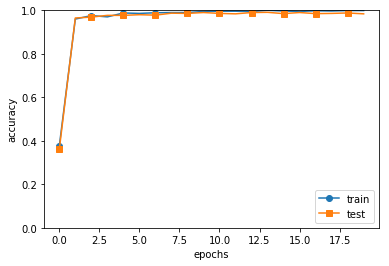

In [12]:

import sys, os
sys.path.append(os.path.abspath('./dl_ex'))  #載入父目錄檔案的設定
import numpy as np
import matplotlib.pyplot as plt
from dl_ex.dataset.mnist import load_mnist
from dl_ex.common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)


# 如果處理需要時間，則減少數據
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()


# 保存參數
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 繪製圖形

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## 7.6 CNN的視覺化
使用於CNN的卷積層，究竟可以「看到甚麼」? 以下將透過視覺化卷積層的方式，探討CNN到底執行了甚麼<br><br>


### 7.6.1 視覺化第1層權重
前面針對MNIST資料集，進行了單純的CNN學習。現在，第1層卷積層的權重形狀為(30,1,5,5)，亦即大小是5x5，色板為1的濾鏡有30個。
濾鏡大小為5x5，色板數量為1，代表濾鏡可以當作是1色板的灰階影像。接下來，把卷積層(第1層)的濾鏡顯示成影像。
這裡要比較的是學習前與學習後的權重，結果如下圖所示。<br>
![7.6.1](./img/7.6.1.PNG)<br><br>

由於學習前的濾鏡進行了隨機初始化，所以黑白深淺沒有規則性。然而，結束學習的濾鏡改變成了有規則的影像。由此可知，藉由學習，更新成具有規則性的濾鏡，包括伴隨由白到黑漸層變化的濾鏡、具有塊狀區域(這裡稱作「塊(blob)」)的濾鏡等。<br>
圖中，學習前與學習後第1層卷積層的權重:權重的元素是實數，在顯示的影像中，以最小值為黑色(0)，最大值為白色(255)來進行正規化。<br><br>

右側這種有規則性的濾鏡，「看到了甚麼」?看到了邊界(顏色變化的邊緣)與塊狀(局部的塊狀區域)等。假設濾鏡的左半部分是白色，右半部分是黑色，那就會變成顯示垂直邊界的濾鏡，如下圖所示。<br>
![7.6.1.1](./img/7.6.1.1.PNG)<br>
反應水平邊界與垂直邊界的濾鏡:輸出影像1在垂直邊界出現白色像素，而輸出影像2在水平邊界出現許多白色像素。而這種卷積層的濾鏡可以擷取出邊界與塊狀等原始資料，把這種原始資料傳遞給下一層，就是由前面說明的CNN來執行。



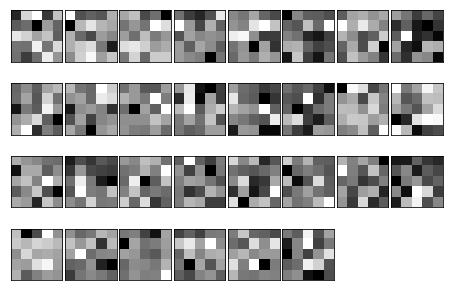

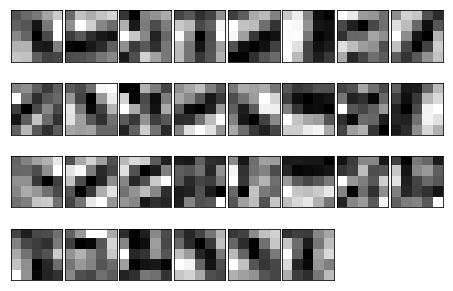

In [1]:
%matplotlib inline
import sys, os
sys.path.append(os.path.abspath('./dl_ex'))  #載入父目錄檔案的設定
import numpy as np
import matplotlib.pyplot as plt
from dl_ex.ch07.simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx)) #取頂

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 隨機初始化後的權重
filter_show(network.params['W1'])

# 經過學習後的權重
network.load_params("params.pkl")
filter_show(network.params['W1'])


### 7.6.2 利用階層結構擷取資料
上面的結果是以第1層卷積層為對象，在第1層卷積層中，擷取出邊界及塊狀等初階資料。在可以重疊多層結構的CNN中，隨著層數加深，擷取的資料(也就是反應強烈的神經元)會變得更抽象化。<br><br>


## 7.7 代表性的CNN
CNN提出了各種結構的網路，以下要介紹兩個最重要的網路。第一種是在1998年首度提出的CNN鼻祖LeNet。另一個是深度學習受到矚目後，於2012年提出的AlexNet。


### 7.7.1 LeNet
1998年所提出的，用來進行手寫數字辨識的網路，如下圖所示，連續執行卷積層與池化層(正確來說只有「分隔元素」的次取樣層)，最後透過全連接層輸出結果。<br>
![7.7.1](./img/7.7.1.PNG)<br>
比較LeNet與現在的CNN，可以發現有些差異，如第一個活化函數，LeNet使用的是sigmoid函數，而現在的CNN以ReLU為主。另外，LeNet中，還會以次取樣(subsampling)來縮小中間資料的大小，但是現在的CNN是以最大池化為主。


### 7.7.2 AlexNet
LeNet問世後，過了將近20年，才提出AlexNet。AlexNet在深度學習中框架中扮演著先驅者的腳色，基本上的結構與LeNet差不多。<br>
![7.7.2](./img/7.7.2.PNG)<br>
與LeNet的相異點列於以下。
* 使用ReLU活化函數
* 使用LRN(Local Response Normalization)局部性正規化層
* 使用dropout(參考6.4.3)<br>


## 7.8 重點整理
本章學習了CNN，構成CNN的基本模組「卷積層」與「池化層」只要了解後，後續就只剩下如何運用的問題。在處理影像的範疇，幾乎都可以使用CNN。
* CNN在全連接層的網路中，新加入了卷積層與池化層
* 使用im2col(將影像轉換成陣列的函數)，就可以輕鬆快速地執行卷積層與池化層
* 將CNN視覺化，可以瞭解加深層數後，擷取出的高階資料模樣
* CNN的代表性網路包括LeNet、AlexNet
* 大數據與GPU對深度學習發展有重要的貢獻

